# matplotlib Artist(各种图形结构)
matplotlib的原理是 用Artist对象在画布(canvas)上绘制(render)图形
这三步分别对应了三个层次的API：
1. matplotlib.backend_bases.FigureCanvas 代表了绘图区 所有图像都是在绘图区完成的
2. matplotlib.backend_bases.Renderer 代表了渲染器 可以理解为画笔
3. matplotlib.artist.Artist 代表了图标组件

**前两个部分处理程序和计算机底层的交互 第三层的Artist是具体调用的接口来作图**
## Artist分类
Artist有两种类型 primitives和containers
primitive是基本要素 包含标准图形 曲线Line2D 文字text 矩形Rectangle 图像image
container是容器用来装基本要素(primitive)的 包括图形figure 坐标系axes 和 坐标轴axis

In [55]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

In [ ]:
## primitives
### 2DLines
2DLines主要是处理曲线的绘制
常用的参数：
1. xdata x轴的取值 如果不显式定义则是range(1,len(ydata)+1)即从1到len(ydata)
2. ydata y轴的取值
3. linewidth 线条宽度
4. linestyle 线条形式
5. color 现调颜色
6. marker 点的标记
7. markersize 标记的大小

设置Line的属性有三种
1. 直接plot()函数设置
2. 获取line对象进行设置
3. 获得line属性 使用setp()函数设置

line的种类：
1. 绘制直线line
2. 带errorbar的误差折线图
errorbar的参数不同的有 yerr xerr ecolor elinewidth都是指定error部分的属性

line的绘制方法：
1. plot绘制
2. Line2D对象绘制(了解)

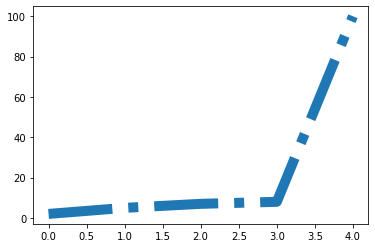

In [56]:
# 2DLines
# 直接plot设置
x = range(0,5)
y = [2,5,7,8,100]
plt.plot(x, y, linewidth = 10, linestyle='-.') # 直接在plot的参数中设置
plt.show()

<class 'matplotlib.lines.Line2D'>


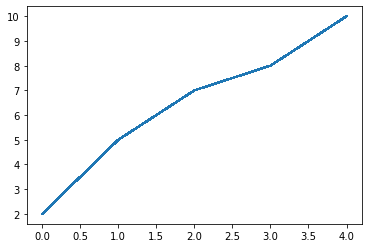

In [57]:
# 获得line的对象 对其调用函数方法
x = range(0,5)
y = [2,5,7,8,10]
line, = plt.plot(x,y,'-') # plt.plot()方法返回line2D对象 注意一定要带逗号
print(type(line))
line.set_antialiased(False) # 关闭抗锯齿 用line对象的函数进行实现

<class 'list'>


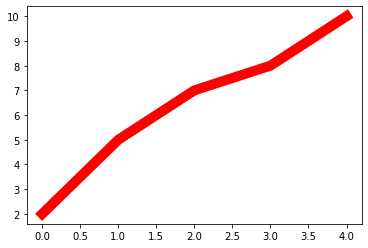

In [58]:
# 获得线属性 用plt.step()函数进行设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x,y) # 不加逗号返回值是list
print(type(lines))
plt.setp(lines, color = 'r', linewidth = 10); # plt.setp可以处理list

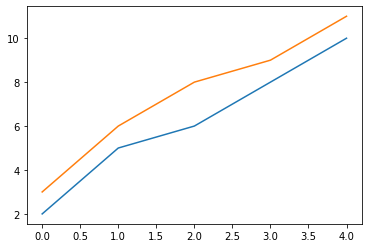

In [75]:
# plot绘制line
x = range(0,5)
y1 = [2,5,6,8,10]
y2 = [3,6,8,9,11]

fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.lines # 可以看到ax.lines中有两个Line2D对象
# plt.show()
# plt.savefig('img/line_example.png')

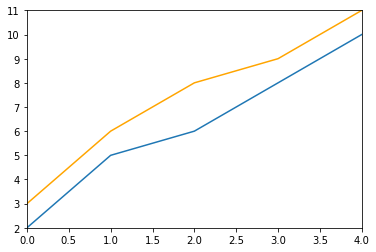

In [60]:
# Line2D对象绘制
x = range(0,5)
y1 = [2,5,6,8,10]
y2 = [3,6,8,9,11]

fig, ax = plt.subplots()
lines = [Line2D(x,y1), Line2D(x,y2,color='orange')] # 显示创建Line2D对象
for line in lines:
    ax.add_line(line) # add_line方法将自定义的Line2D对象加入ax中
ax.set_xlim(0,4)
ax.set_ylim(2,11);

# errorbar 误差折线图
fig, ax = plt.subplots()

x = np.arange(10)
y = 2.5 * np.sin(x/ 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
ax.errorbar(x, y+3, yerr=yerr, label = 'both limits'); # ax.errorbar进行绘图
plt.savefig('img/line_with_errorbar_example.png')

### patches
patches.Patch绘制二维图形
常见的有 矩形 多边形 楔形

#### 矩形
矩形常见的有直方图hist和条形图bar
##### 直方图
**直方图是没有间隙的柱状图 一般是将所有数据按照不同的分区统计在各个区间的次数或者频率**
hist 参数：
1. x 数据集 对x的数据进行统计绘制直方图
2. bins 统计的区间分布
3. range 显示的区间 如果没有定义bins 使用range
4. density bool 默认False 显示频数统计结果
5. histtype 直方图的种类{'bar', 'barstacked', 'step', 'stepfilled'} 默认为bar 推荐使用默认 step是梯子状
6. align 柱状图的水平分布 {'left', 'mid', 'right'} 默认mid 推荐默认
7. log bool 默认False 坐标轴是否使用log
8. stacked bool 默认False 选择是否为堆积状图

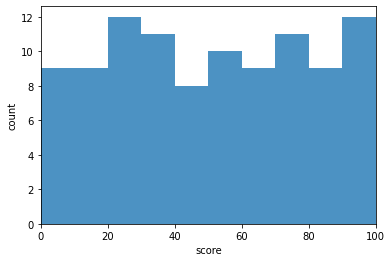

In [77]:
x = np.random.randint(0,100,100) # 生成0-100的100个数 进行直方图的绘制
bins = np.arange(0,101,10) # bins是各个区间的左边界值[bin1, bin2) [bin2, bin3) ...

fig, ax = plt.subplots()
ax.hist(x, bins, density = False, alpha=0.8) # density True纵轴是频率 False纵轴是count
plt.xlabel('score')
plt.ylabel('count')
plt.xlim(0,100)
plt.savefig('img/hist_count_example.png')
# 注意density参数定为False 纵轴使用的是次数count

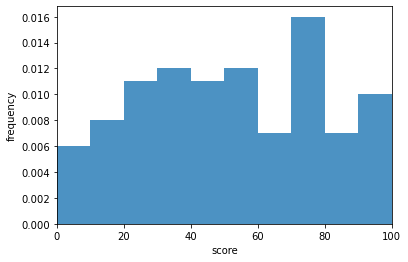

In [78]:
x = np.random.randint(0, 100, 100)  # 生成0-100的100个数 进行直方图的绘制
bins = np.arange(0, 101, 10)  # bins是各个区间的左边界值[bin1, bin2) [bin2, bin3) ...

fig, ax = plt.subplots()
ax.hist(x, bins, density=True, alpha=0.8)  # density True纵轴是频率 False纵轴是count
plt.xlabel('score')
plt.ylabel('frequency')
plt.xlim(0, 100)
plt.savefig('img/hist_frequency_example.png')

In [64]:
df = pd.DataFrame(columns=['data'])
df.loc[:,'data'] = x
df['class'] = pd.cut(df['data'], bins = bins, right=False, include_lowest=True)
df
# 使用x和bins创建分类区间 生成class列

,data,class
0,76,"[70, 80)"
1,55,"[50, 60)"
2,73,"[70, 80)"
3,66,"[60, 70)"
4,59,"[50, 60)"
...,...,...
95,46,"[40, 50)"
96,45,"[40, 50)"
97,80,"[80, 90)"
98,21,"[20, 30)"


In [65]:
# 按照出现的频率进行统计次数
df_cnt = df['class'].value_counts()
df_cnt = df_cnt.reset_index()
df_cnt

,index,class
0,"[40, 50)",14
1,"[0, 10)",13
2,"[30, 40)",11
3,"[20, 30)",11
4,"[60, 70)",10
5,"[50, 60)",10
6,"[90, 100)",8
7,"[80, 90)",8
8,"[10, 20)",8
9,"[70, 80)",7


In [66]:
print(re.findall('\[(.*)\,','[20,30)'))
print(re.findall('\,(.*)\)','[20,30)'))

['20']
['30']


In [67]:
# 用正则表达式将index划分为最大值、最小值和区间长度
df_cnt.loc[:,'mini'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\[(.*)\,',x)[0]).astype(int)
df_cnt.loc[:, 'max'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\,(.*)\)',x)[0]).astype(int)
df_cnt.loc[:,'width'] = df_cnt['max']- df_cnt['mini']
df_cnt

,index,class,mini,max,width
0,"[40, 50)",14,40,50,10
1,"[0, 10)",13,0,10,10
2,"[30, 40)",11,30,40,10
3,"[20, 30)",11,20,30,10
4,"[60, 70)",10,60,70,10
5,"[50, 60)",10,50,60,10
6,"[90, 100)",8,90,100,10
7,"[80, 90)",8,80,90,10
8,"[10, 20)",8,10,20,10
9,"[70, 80)",7,70,80,10


In [68]:
df_cnt.sort_values('mini', ascending=True, inplace=True)
df_cnt.reset_index(inplace=True, drop=True)
df_cnt

,index,class,mini,max,width
0,"[0, 10)",13,0,10,10
1,"[10, 20)",8,10,20,10
2,"[20, 30)",11,20,30,10
3,"[30, 40)",11,30,40,10
4,"[40, 50)",14,40,50,10
5,"[50, 60)",10,50,60,10
6,"[60, 70)",10,60,70,10
7,"[70, 80)",7,70,80,10
8,"[80, 90)",8,80,90,10
9,"[90, 100)",8,90,100,10


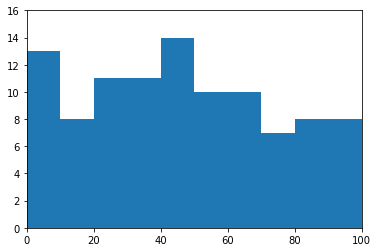

In [69]:
fig, ax = plt.subplots()
for i in df_cnt.index:
    rect = plt.Rectangle((df_cnt.loc[i,'mini'], 0), df_cnt.loc[i,'width'], df_cnt.loc[i,'class'])
    # 使用原生的矩形方法进行作图 选择x width y 进行作图
    ax.add_patch(rect)
ax.set_ylim(0,16)
ax.set_xlim(0,100)
plt.show()
# hist的本质就是自动地按照bin作为x值和width 同时自动地计算出现次数作为y 进行矩形的制作

##### bar-柱状图
柱状图是对每个x位置的对应y值用与y轴等高的柱子进行表示
直方图就是柱间距 = 1的柱状图 柱状图就是柱间距小于1的直方图
bar参数：
1. left: x轴的位置序列 一般采用range函数生成一个序列 有时可以是字符串
2. height: y轴的数值序列 也就是柱形图的高度
3. alpha: 透明度
4. width: 柱形图的宽度 一般是0.8
5. color: 柱形图填充的颜色
6. edgecolor:  图形边缘的颜色
7. label 解释图像代表的意思 为legend()做铺垫 表示该bar的标签

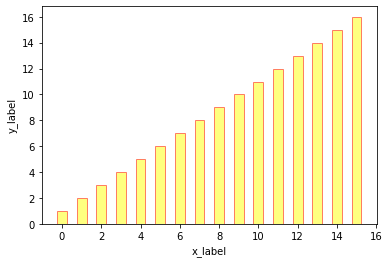

In [79]:
fig, ax = plt.subplots()
y = range(1, 17)
ax.bar(
    np.arange(16),  # x值
    y,              # y值
    alpha = 0.5,
    width = 0.5,    # z
    color = 'yellow', # 柱状图的颜色
    edgecolor = 'red', # 柱子边缘的颜色
    label = 'The first bar'
)
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.savefig('img/bar_example.png')

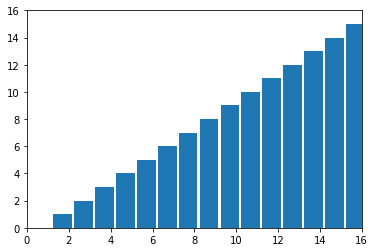

In [71]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(1,17):
    rect = plt.Rectangle((i+0.25,0), 0.9, i)
    # 将i+0.25作为x 0.5为宽度 i为高度的 矩形图 如果width = 1那么就变成了直方图
    ax1.add_patch(rect)
ax1.set_xlim(0,16)
ax1.set_ylim(0,16);

#### 多边形Polygon
Polygon类是多边形类 其构造函数Polygon(xy, closed = True)
xy是一个N*2的numpy array 为多边形的定点 closed为True代表起点的终点重合
使用fill方法进行作图
fill参数：
1. x 横轴值
2. y 纵轴值
3. color 颜色说明符

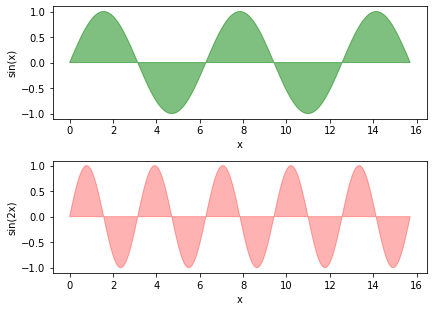

In [80]:
x = np.linspace(0,5 * np.pi, 1000)
y1 = np.sin(x)
y2 = np.sin(2 * x)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.fill(x, y1, color = 'g', alpha = 0.5)
plt.xlabel('x')
plt.ylabel('sin(x)')

plt.tight_layout()

ax2 = fig.add_subplot(212)
ax2.fill(x, y2, color = 'red', alpha = 0.3)
plt.xlabel('x')
plt.ylabel('sin(2x)')
plt.savefig('img/polygon_example.png')

#### 楔形 Wedge
Wedge是楔形类 构造函数Wedge(center, r, theta1, theta2)
center是中心点(x,y) 半径为r 从theta1扫到theta2 单位是度
常用的是饼状图pie 饼状图是制作数据x的饼图 每个楔子的面积用x/sum(x)表示百分比
主要参数:
1. x 楔形的数据 一维数组
2. explode: 如果不等于None 则是一个len(x)数组，用于指定偏移的分数 就是突出于饼的部分
3. labels: 指定每个楔块的名字
4. colors: 每个楔块的颜色
5. startangle: 开始绘制的角度
6. autopct 表示百分比1.1f%
7. shadow 有无阴影

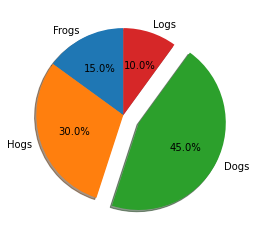

In [95]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
explode = (0, 0, 0.2, 0)
fig, ax = plt.subplots()
# ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90);
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.savefig('img/pie_example.png')
# ax1.axis('equal')

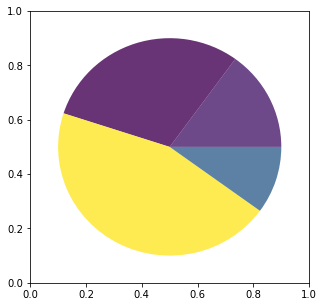

In [117]:
# wedge原生创建楔形图
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

theta1 = 0
sizes = [15, 30, 45, 10]
patches = list()
patches += [
    Wedge((0.5, 0.5), .4, 0, 54),
    Wedge((0.5, 0.5), .4, 54, 162),
    Wedge((0.5, 0.5), .4, 162, 324),
    Wedge((0.5, 0.5), .4, 324, 360),   # 中心点 半径 theta1 theta2
]
colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.8) # PatchCollection
p.set_array(colors)
ax1.add_collection(p) #
plt.savefig('img/wedge_example.png')

### collections
collections类是用来绘制一组对象的集合 有很多不同的子类 如RegularPolyCollection, CircleCollection, PathCollection
常用的散点图 属于PathCollection子类 scatter方法提供了该类的封装
scatter参数:
1. x: 数据点x轴的位置
2. y: 数据点y轴的位置
3. s: 尺寸大小 可以是个list对应每个点的大小
4. c: 颜色 可以是单个颜色 也可以是个list 对应每个点的颜色
5. marker: 标记的类型
6. 其他参数 alpha linewidths edgecolors

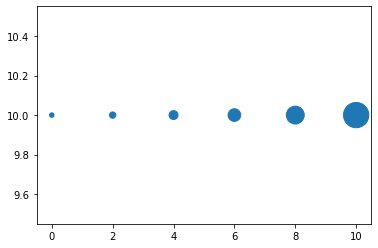

In [120]:
x = [0, 2, 4, 6, 8, 10]
y = [10] * len(x)
s = [20 * 2 ** n for n in range(len(x))]
fig, ax = plt.subplots()
ax.scatter(x, y, s= s)
plt.savefig('img/scatter_example.png');

### images
images是绘制image图像的类 最常用的imshow可以根据数据绘制图像
使用imshow画图时 首先需要传入一个数组 X 数组对应的是空间内像素位置和像素点的值
interpolation参数可以设置不同的差值方法

[[0.96549047 0.93896383 0.5736911  0.72422093 0.02305113]
 [0.86142797 0.30237834 0.44849452 0.28596383 0.71173438]
 [0.75921652 0.98600059 0.99121568 0.40873742 0.00959257]]


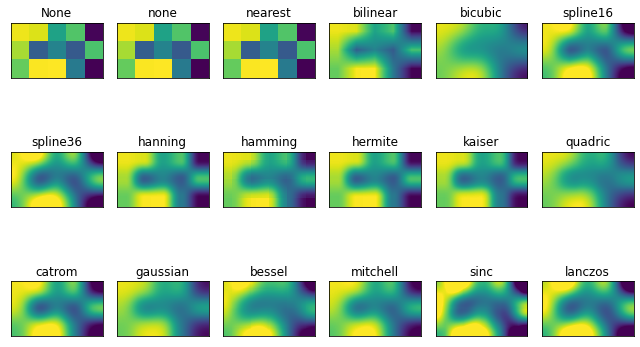

In [135]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
# interpolation的string参数

grid = np.random.rand(3,5)
fig, ax = plt.subplots(nrows=3, ncols=6, figsize = (9,6),
                       subplot_kw={'xticks' :[], 'yticks':[]})

for ax, interp_method in zip(ax.flat, methods): # ax.flat作为各个子图 methods是插值方法
    ax.imshow(grid, interpolation = interp_method, cmap = 'viridis') # grid是参数值 一个矩阵 interpolation插值方法
    ax.set_title(str(interp_method))
print(grid)
plt.tight_layout()
plt.savefig('img/images_example.png');